   <h1 align="center"> <font color='228303'>Introduction</font> <h1> 

<div class="alert alert-block alert-info">
    <b></b>
Bonjour Marc.
Pour rappel je remplace Julien qui a du arrêté en cours de route. J’ai récupéré et continué ses travaux pour réaliser une étude sur l’alimentation et plus particulièrement la sous nutrition dans le monde.  Les données que tu m’as confié sont issues de notre organisation FAO « L’organisation des Nations Unies pour l’alimentation et l’agriculture ». Je rappel que notre but au sein de cette agence est d’atteindre la sécurité alimentaire pour tous et d’assurer un accès régulier et suffisant à une nourriture de bonne qualité permettant à tous de mener une vie saine et active.  
        </div>

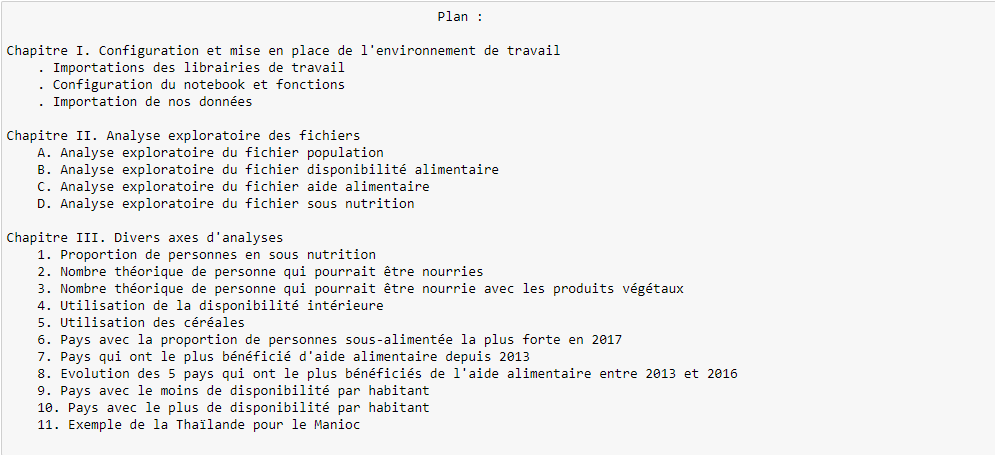

<h1 align="center"> <font color='228303'>I. Configuration et mise en place de l'environnement de travail</font>  <h1> 

<h4 align="center"> <font color='228303'>Importation des librairies de travail</font>  <h4> 

In [96]:
#Importation de la librairie Pandas
import pandas as pd

#Importation eviter les messages rouges d'erreurs
import warnings
warnings.filterwarnings("ignore")

<h4 align="center"> <font color='228303'> Configuration du notebook et fonctions </font> <h4> 

In [ ]:
# Configuration du display options afficher toutes les lignes
pd.set_option("display.max_rows", None)

<h4 align="center"> <font color='228303'> Importation de nos données </font> <h4> 

In [97]:
#Importation du fichier population.csv
population = pd.read_csv('C:/Users/alex/Desktop/Projet_4/DAN-P4-FAO/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('C:/Users/alex/Desktop/Projet_4/DAN-P4-FAO/dispo_alimentaire.csv')


#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('C:/Users/alex/Desktop/Projet_4/DAN-P4-FAO/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('C:/Users/alex/Desktop/Projet_4/DAN-P4-FAO/sous_nutrition.csv')

<h1 align="center"> <font color='228303'> II. Analyse exploratoire des fichiers </font> <h1> 

> *Maintenant je vais parler de la méthodologie que j’ai appliqué pour ce projet.*

> *Tout d’abord j’ai utilisé 4 sources de données qui sont complémentaires pour cette étude. 
Un fichier « disponibilité alimentaire » : qui recense des informations sur la disponibilité alimentaire ainsi que son acquisition (utilisations / moyens) par pays pour l’année 2017.
Un fichier d’insécurité alimentaire qui inclut le nombre de personnes en sous alimentation par pays.
Un fichier « population » qui inclut le nombre d’habitant par pays
Un fichier « aide alimentaire » qui référence à la quantité d’aide alimentaire reçu par pays.*

> *Les données étaient propres dans l’ensemble j’ai fait attention qu’elles ne contiennent pas de valeurs aberrantes puis j’ai normalisé les unités de valeurs pour éviter de se perdre dans nos analyses (dispo alimentaire en tonnes / les autres tables en KG). Je tiens juste à préciser dans cette étude quand je parlerai de zone cela référencera au pays (toutes les zones ne sont pas reconnus officiellement comme pays (par l’ONU)).J’ai fais attention à respecter les recommandations du RGPD (règlementation général sur la protection des données), toutes les données présentes ne sont pas personnels. De ce fait on encours aucune violation de lois. De plus elles sont mis à disposition de tous au sein de notre organisme FAO.* 

<h2 align="center"> <font color='228303'> A. Analyse exploratoire du fichier population </font> <h2> 

In [98]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [99]:
#Consulter le nombre de colonnes et lignes

population.shape

(1416, 3)

In [100]:
#La nature des données dans chacune des colonnes

population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [101]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple

population.describe()

,Année,Valeur
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


In [102]:
#Affichage les 5 premières lignes de la table

population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [103]:
# Vérification qu'il n'y ait pas de valeur nulle

population.isna().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [104]:
#Vérification qu'il n'y ait pas de doublons / compte le nombre de ligne en doublon

print(population.duplicated().sum())

0


In [105]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000 
#==> normaliser de milliers d'habitants au nombre exact d'habitants (Multiplication de la colonne valeur par 1000)

population['Valeur'] = population['Valeur']*1000
population['Valeur']= population['Valeur'].astype(int)
population['Valeur'].head()

0    32269589
1    33370794
2    34413603
3    35383032
4    36296113
Name: Valeur, dtype: int32

In [106]:
#changement du nom de la colonne Valeur par Population

population = population.rename(columns={"Valeur": "Population"})

In [107]:
#Affichage les 5 premières lignes de la table pour voir les modifications

population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


<h2 align="center"> <font color='228303'> B. Analyse exploratoire du fichier disponibilité alimentaire </font> <h2> 

In [108]:
#Afficher les dimensions du dataset

dispo_alimentaire.shape

(15605, 18)

In [109]:
#Consulter le nombre de colonnes

NombreColonnes = len(dispo_alimentaire.axes[1])
print("Il y a ", NombreColonnes, "colonnes")

Il y a  18 colonnes


In [110]:
#La nature des données dans chacune des colonnes

dispo_alimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [111]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple et voir la distributiuon des données

dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [112]:
#Vérification qu'il n'y ait pas de doublons / compte le nombre de ligne en doublon

print(dispo_alimentaire.duplicated().sum())

0


In [113]:
#Affichage les 5 premières lignes de la table

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [114]:
# DF présente des valeurs nulles

dispo_alimentaire.isna().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [115]:
#remplacement des NaN dans le dataset par des 0

dispo_alimentaire.fillna(0, inplace = True)

In [116]:
#multiplication de toutes les lignes contenant des milliers de tonnes en tonnes

Liste=['Aliments pour animaux','Autres Utilisations','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock','Disponibilité intérieure']
for i in Liste:
    dispo_alimentaire[i] = dispo_alimentaire[i]*1000





In [117]:
#Affichage les 5 premières lignes de la table

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<h2 align="center"> <font color='228303'> C. Analyse exploratoire du fichier aide alimentaire </font> <h2> 

In [118]:
#Afficher les dimensions du dataset
aide_alimentaire.shape

(1475, 4)

In [119]:
#Consulter le nombre de colonnes
NombreColonnes = len(aide_alimentaire.axes[1])
print("Il y a ", NombreColonnes, "colonnes")

Il y a  4 colonnes


In [120]:
#La nature des données dans chacune des colonnes

aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [121]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple

aide_alimentaire.describe()

,Année,Valeur
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


In [122]:
#Vérification qu'il n'y ait pas de doublons / compte le nombre de ligne en doublon

print(aide_alimentaire.duplicated().sum())

0


In [123]:
#Vérification qu'il n'y ait pas de valeurs nulles

aide_alimentaire.isna().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [124]:
#Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [125]:
#changement du nom de la colonne Pays bénéficiaire par Zone

aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"})

In [126]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000

In [127]:
#Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<h2 align="center"> <font color='228303'> D. Analyse exploratoire du fichier sous nutrition </font> <h2> 

In [128]:
#Afficher les dimensions du dataset
sous_nutrition.shape

(1218, 3)

In [129]:
#Consulter le nombre de colonnes
NombreColonnes = len(sous_nutrition.axes[1])
print("Il y a ", NombreColonnes, "colonnes")

Il y a  3 colonnes


In [130]:
#La nature des données dans chacune des colonnes

sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [131]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple

sous_nutrition.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


In [132]:
#Vérification qu'il n'y ait pas de doublons / compte le nombre de ligne en doublon

print(sous_nutrition.duplicated().sum())

0


In [133]:
#Vérification qu'il n'y ait pas de valeurs nulles

sous_nutrition.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [134]:
#Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [135]:
#Conversion de la colonne sous nutrition en numérique (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)

sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [136]:
#Puis remplacement des NaN en 0

sous_nutrition['Valeur'].fillna(0, inplace = True)

In [137]:
#changement du nom de la colonne Valeur par sous_nutrition

sous_nutrition = sous_nutrition.rename(columns={"Valeur": "sous_nutrition"})

In [138]:
#Multiplication de la colonne sous_nutrition par 1000000 (harmoniser passer de millions d'habitants au nombre d'habitants)

sous_nutrition['sous_nutrition'] = (sous_nutrition['sous_nutrition']*1000000).astype(int)

In [139]:
#Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000
1,Afghanistan,2013-2015,8800000
2,Afghanistan,2014-2016,8900000
3,Afghanistan,2015-2017,9700000
4,Afghanistan,2016-2018,10500000


<h1 align="center"> <font color='228303'> III. Divers axes d'analyses </font> <h1> 

<h2 align="center"> <font color='228303'> 1. Proportion de personnes en sous nutrition </font> <h2> 

In [140]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

#Change la plage des années de sous nutrition par une année fixe
sous_nutrition['Année'] = sous_nutrition['Année'].str.split('-')
sous_nutrition['Année'] = sous_nutrition['Année'].str[0].astype(int)+1

#je recupère 2 DF avec juste l'année 2017 comme demandé
population2017 = population.loc[population['Année'] == 2017,:] 
sous_nutrition2017 = sous_nutrition.loc[sous_nutrition['Année'] == 2017,:] 


In [141]:
sous_nutrition2017['Zone'].nunique()

203

In [142]:
population2017['Zone'].nunique()

236

In [143]:
# Jointure interne population 236 lignes(zone) , sous_nutrition 203 lignes(zone)
pop_sous_nutrition2017 = pd.merge(population2017, sous_nutrition2017, on=['Zone','Année'], how='inner')

In [144]:
pop_sous_nutrition2017['Zone'].nunique()

203

In [145]:
#Affichage du dataset
pop_sous_nutrition2017.head()

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113,10500000
1,Afrique du Sud,2017,57009756,3100000
2,Albanie,2017,2884169,100000
3,Algérie,2017,41389189,1300000
4,Allemagne,2017,82658409,0


In [146]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

R_PopSousNutrition = round(pop_sous_nutrition2017['sous_nutrition'].sum()*100/pop_sous_nutrition2017['Population'].sum(),2)
NbrPopSousNutrition = int(pop_sous_nutrition2017['sous_nutrition'].sum())
NbrePop = pop_sous_nutrition2017['Population'].sum()
print('Il y a',R_PopSousNutrition,'% de la population en état de sous nutrition')
print('Soit',NbrPopSousNutrition,'personnes de la population mondiale en état de sous nutrition, sur une base de',NbrePop,'personnes de la population mondiale issu de nos données')

Il y a 7.1 % de la population en état de sous nutrition
Soit 535700000 personnes de la population mondiale en état de sous nutrition, sur une base de 7543798769 personnes de la population mondiale issu de nos données


<h2 align="center"> <font color='228303'> 2. Nombre théorique de personne qui pourrait être nourries </font> <h2> 

In [147]:
#Source: Santé.gouv => En moyenne homme et femme confondus 2300Kcal/jour soit 839500kcal/année (2300*365 = 839500).
#On part du principe que la proportion de femme et homme est égale (102/100).

In [148]:
dispo_alimentaire['Zone'].nunique()

174

In [149]:
population2017['Zone'].nunique()

236

In [150]:
# Jointure interne entre le DF population2017 et celui des disponibilités alimentaires : 172 Zones communes
# Pour plus de cohérence je veux la pop totale dont j'ai les infos de sa disponibilité alimentaire et inversement

pop_dispo_alimentaire2017 = pd.merge(dispo_alimentaire, population2017, on='Zone', how='inner')

In [151]:
#Affichage du nouveau dataframe

pop_dispo_alimentaire2017.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113


In [152]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement

pop_dispo_alimentaire2017['dispo_kcal'] = pop_dispo_alimentaire2017["Disponibilité alimentaire (Kcal/personne/jour)"] * pop_dispo_alimentaire2017['Population'] * 365 
DispoAlimentaire = pop_dispo_alimentaire2017['dispo_kcal'].sum()

In [153]:
# Récuperer le nombre totale de la population dont nous avons les données de la disponibilité alimentaire (sur 172 zones)

pop_dispo_alimentaire2017_TMP = pd.DataFrame(pop_dispo_alimentaire2017.groupby(by='Zone').max()['Population']).reset_index()
PopTotale = pop_dispo_alimentaire2017_TMP['Population'].sum()

In [155]:
#Calcul du nombre d'humains pouvant être nourris avec la disponibilité alimentaire totale

NbrKCalPersonneAn = 839500
NbrHumainsNourris = round((DispoAlimentaire / NbrKCalPersonneAn),0)
R_HumainsNourris = NbrHumainsNourris*100/PopTotale

print("Le nombre de personne théorique qui peuvent être nourris est de",round(NbrHumainsNourris)," personnes")
print("Soit",round(R_HumainsNourris), "% de la population mondiale")

Le nombre de personne théorique qui peuvent être nourris est de 9095210700  personnes
Soit 125 % de la population mondiale


<h2 align="center"> <font color='228303'> 3. Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux </font> <h2> 

In [156]:
#Transfert des données avec les végétaux dans un nouveau dataframe toujours pour l'année 2017

pop_dispo_alimentaire2017_vegetale = pop_dispo_alimentaire2017.loc[pop_dispo_alimentaire2017['Origine']== 'vegetale',:]
pop_dispo_alimentaire2017_vegetale.drop(columns=['Année'], inplace=True)
pop_dispo_alimentaire2017_vegetale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,36296113,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,36296113,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,36296113,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,36296113,0.000000e+00


In [157]:
#Calcul du nombre de kcal disponible pour les végétaux

pop_dispo_alimentaire2017_vegetale['dispo_kcal'] = pop_dispo_alimentaire2017_vegetale["Disponibilité alimentaire (Kcal/personne/jour)"] * pop_dispo_alimentaire2017_vegetale['Population'] * 365 
DispoAlimentaireVegetale = pop_dispo_alimentaire2017_vegetale['dispo_kcal'].sum()
print("Le nombre de Kcal disponible mondialement issu à partir de produit d'origine végétale est de : " ,int(DispoAlimentaireVegetale), "Kcal")

Le nombre de Kcal disponible mondialement issu à partir de produit d'origine végétale est de :  6300178932059760 Kcal


In [158]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

NbrKCalPersonneAn = 839500
NbrHumainsNourrisVegetale = round((DispoAlimentaireVegetale / NbrKCalPersonneAn),0)
R_HumainsNourrisVegetaux = NbrHumainsNourrisVegetale*100/PopTotale

print("Le nombre de personnes théoriques qui peuvent être nourris avec des produits issu d'origine végétale est de",round(NbrHumainsNourrisVegetale)," personnes")
print("Soit",round(R_HumainsNourrisVegetaux), "% de la population mondiale")

Le nombre de personnes théoriques qui peuvent être nourris avec des produits issu d'origine végétale est de 7504680086  personnes
Soit 103 % de la population mondiale


In [159]:
# Analyse complémentaire
#Calcul du nombre d'humains pouvant être nourris avec des produits d'origine animale

pop_dispo_alimentaire2017_animale = pop_dispo_alimentaire2017.loc[pop_dispo_alimentaire2017['Origine']== 'animale',:]
pop_dispo_alimentaire2017_animale.drop(columns=['Année'], inplace=True)
pop_dispo_alimentaire2017_animale['dispo_kcal'] = pop_dispo_alimentaire2017_animale["Disponibilité alimentaire (Kcal/personne/jour)"] * pop_dispo_alimentaire2017_animale['Population'] * 365 
DispoAlimentaireAnimale = pop_dispo_alimentaire2017_animale['dispo_kcal'].sum()

NbrKCalPersonneAn = 839500
NbrHumainsNourrisAnimale = round((DispoAlimentaireAnimale / NbrKCalPersonneAn),0)
R_HumainsNourrisAnimale = NbrHumainsNourrisAnimale/PopTotale*100


print("Le nombre de Kcal disponible mondialement à partir de produit issu d'une production animale est de : " ,int(DispoAlimentaireAnimale), "Kcal")
print("Le nombre de personnes théoriques qui peuvent être nourris avec des produits d'origine animale est de",round(NbrHumainsNourrisAnimale)," personnes")
print("Soit",round(R_HumainsNourrisAnimale), "% de la population mondiale")

Le nombre de Kcal disponible mondialement à partir de produit issu d'une production animale est de :  1335250450227795 Kcal
Le nombre de personnes théoriques qui peuvent être nourris avec des produits d'origine animale est de 1590530614  personnes
Soit 22 % de la population mondiale


<h2 align="center"> <font color='228303'> 4. Utilisation de la disponibilité intérieure </font> <h2> 

In [160]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [161]:
#Calcul de la disponibilité totale: disponibilité totale = dispo interieur 

DisponibiliteTotale = dispo_alimentaire['Disponibilité intérieure'].sum()
print("la disponibilité totale pour l'année 2017 est de",DisponibiliteTotale,'Tonnes')

la disponibilité totale pour l'année 2017 est de 9848994000.0 Tonnes


In [162]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, 
#nourritures,Autres Utilisations et on rajoute Semences et Traitement

Liste_DI = ['Pertes','Aliments pour animaux', 'Nourriture', 'Autres Utilisations', 'Semences', 'Traitement']
Liste_TMP = []
for i in Liste_DI:
    i = round(dispo_alimentaire[i].sum()*100/dispo_alimentaire['Disponibilité intérieure'].sum(),1)
    Liste_TMP.append(i)

Pertes = Liste_TMP[0]  
print('La part des pertes de la disponibilité totale représente',Pertes,'%')
Aliments_animaux = Liste_TMP[1] 
print('La part des aliments consacrés aux animaux de la disponibilité totale représente',Aliments_animaux,'%')
Nourriture = Liste_TMP[2] 
print("La part de l'alimentation humaine de la disponibilité totale représente",Nourriture,'%')
Autres_Utilisations = Liste_TMP[3]
print('La part des autres utilisations de la disponibilité totale représente',Autres_Utilisations,'%')
Semences = Liste_TMP[4]
print('La part des semances sur la disponibilité totale représente',Semences,'%')
Traitement = Liste_TMP[5]
print('La part des traitements sur la disponibilité totale représente',Traitement,'%')

La part des pertes de la disponibilité totale représente 4.6 %
La part des aliments consacrés aux animaux de la disponibilité totale représente 13.2 %
La part de l'alimentation humaine de la disponibilité totale représente 49.5 %
La part des autres utilisations de la disponibilité totale représente 8.8 %
La part des semances sur la disponibilité totale représente 1.6 %
La part des traitements sur la disponibilité totale représente 22.4 %


Text(0.5, 1.0, 'Proportion de chaque part de la disponibilité totale')

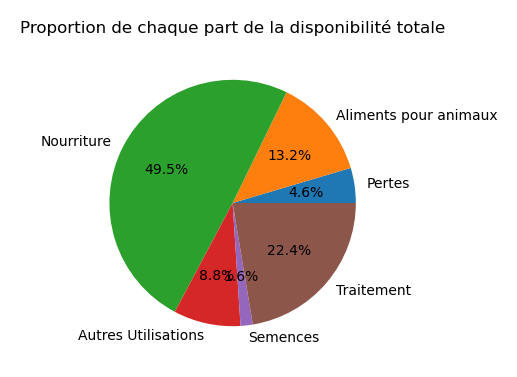

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2),dpi=200)
plt.pie(x=Liste_TMP, labels=Liste_DI, autopct='%1.1f%%', textprops={'fontsize': 5})
plt.title("Proportion de chaque part de la disponibilité totale", fontsize=6)

<h2 align="center"> <font color='228303'> 5. Utilisation des céréales </font> <h2> 

In [164]:
#Création d'une liste avec toutes les variables --> Recuperer dispo_alimentaire['Produit'].unique()

liste = ['Blé','Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

In [165]:
#Création d'un dataframe avec les informations uniquement pour ces céréales

Cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(liste)]

In [166]:
Cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,0.79,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0


In [167]:
#Affichage de la proportion d'alimentation animale 

R_CerealesAnimal = round(Cereales['Aliments pour animaux'].sum()*100 / Cereales['Disponibilité intérieure'].sum(),2)
print(R_CerealesAnimal,"% des céréales de la disponibilité totale est utilisés pour l'alimentation animale en 2017")

36.29 % des céréales de la disponibilité totale est utilisés pour l'alimentation animale en 2017


In [168]:
#Affichage de la proportion d'alimentation animale groupé par céréales

Cereales.groupby(by = 'Produit').sum()['Aliments pour animaux']*100 / Cereales['Disponibilité intérieure'].sum()


Produit
Avoine               0.675156
Blé                  5.387123
Céréales, Autres     0.790819
Maïs                22.688668
Millet               0.137349
Orge                 3.849524
Riz (Eq Blanchi)     1.395680
Seigle               0.336477
Sorgho               1.030661
Name: Aliments pour animaux, dtype: float64

In [169]:
#Affichage de la proportion d'alimentation humaine

R_CerealesHumains = round(Cereales['Nourriture'].sum()*100 / Cereales['Disponibilité intérieure'].sum(),2)
print(R_CerealesHumains,"% des céréales de la disponibilité totale est utilisés pour l'alimentation humaine en 2017")

42.75 % des céréales de la disponibilité totale est utilisés pour l'alimentation humaine en 2017


In [170]:
#Affichage de la proportion d'alimentation humaine groupé par céréales

Cereales.groupby(by = 'Produit').sum()['Nourriture']*100 / Cereales['Disponibilité intérieure'].sum()


Produit
Avoine               0.162152
Blé                 19.020531
Céréales, Autres     0.221188
Maïs                 5.200833
Millet               0.957209
Orge                 0.282260
Riz (Eq Blanchi)    15.674539
Seigle               0.228583
Sorgho               1.003449
Name: Nourriture, dtype: float64

<h2 align="center"> <font color='228303'> 6. Pays avec la proportion de personnes sous-alimentée la plus forte en 2017 </font> <h2> 

In [171]:
#Création de la colonne proportion par pays

pop_sous_nutrition2017['Proportion Personnes en état de sous nutrition'] = round(pop_sous_nutrition2017['sous_nutrition'] *100 / pop_sous_nutrition2017['Population'],2)
pop_sous_nutrition2017.head()


,Zone,Année,Population,sous_nutrition,Proportion Personnes en état de sous nutrition
0,Afghanistan,2017,36296113,10500000,28.93
1,Afrique du Sud,2017,57009756,3100000,5.44
2,Albanie,2017,2884169,100000,3.47
3,Algérie,2017,41389189,1300000,3.14
4,Allemagne,2017,82658409,0,0.00


In [172]:
#Affichage après trie du TOP10 pays avec le plus de personnes en état de sous nutrition

pop_sous_nutrition2017.sort_values('Proportion Personnes en état de sous nutrition', ascending=False).head(10)

,Zone,Année,Population,sous_nutrition,Proportion Personnes en état de sous nutrition
78,Haïti,2017,10982366,5300000,48.26
157,République populaire démocratique de Corée,2017,25429825,12000000,47.19
108,Madagascar,2017,25570512,10500000,41.06
103,Libéria,2017,4702226,1800000,38.28
100,Lesotho,2017,2091534,800000,38.25
183,Tchad,2017,15016753,5700000,37.96
161,Rwanda,2017,11980961,4200000,35.06
121,Mozambique,2017,28649018,9400000,32.81
186,Timor-Leste,2017,1243258,400000,32.17
0,Afghanistan,2017,36296113,10500000,28.93


<h2 align="center"> <font color='228303'> 7. Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013 </font> <h2> 

In [173]:
aide_alimentaire.head(10)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
5,Afghanistan,2014,Céréales,15989000
6,Afghanistan,2013,"Fruits secs, total",85000
7,Afghanistan,2013,Huiles végétales,11087000
8,Afghanistan,2014,Huiles végétales,8185000
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761000


In [174]:
#calcul du total de l'aide alimentaire par pays

aide_alimentaire_zone = pd.DataFrame(aide_alimentaire.groupby(by = 'Zone').sum()['Valeur']).reset_index()

In [176]:
pd.DataFrame(aide_alimentaire.groupby(by = 'Zone').mean()['Valeur']).reset_index()

,Zone,Valeur
0,Afghanistan,1.159075e+07
1,Algérie,2.079846e+06
2,Angola,1.253500e+06
3,Bangladesh,1.392752e+07
4,Bhoutan,2.221667e+05
...,...,...
71,Zambie,7.565000e+05
72,Zimbabwe,3.293158e+06
73,Égypte,5.610000e+05
74,Équateur,2.724000e+05


In [80]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire ici en KG
aide_alimentaire_zone.sort_values(by='Valeur', ascending=False).head(10)


,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<h2 align="center"> <font color='228303'> 8. Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016 </font> <h2> 

In [81]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 

Top5_aide_alimentaire_tmp = pd.DataFrame(aide_alimentaire.groupby(by = ['Zone','Année']).sum()['Valeur']).reset_index()

In [82]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire 

Liste_Top5PlusAideAlimentaire = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [83]:
#On filtre sur le dataframe avec notre liste
# Affichage des pays avec l'aide alimentaire par année

Top5_aide_alimentaire = Top5_aide_alimentaire_tmp.loc[Top5_aide_alimentaire_tmp['Zone'].isin(Liste_Top5PlusAideAlimentaire),:]
Top5_aide_alimentaire

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [84]:
# Affiche l'évolution de N sur N-1

Top5_aide_alimentaire["Evolution"] = round(Top5_aide_alimentaire.groupby('Zone')['Valeur'].pct_change()*100,2)
Top5_aide_alimentaire.fillna(0, inplace=True)
Top5_aide_alimentaire

,Zone,Année,Valeur,Evolution
157,République arabe syrienne,2013,563566000,0.00
158,République arabe syrienne,2014,651870000,15.67
159,République arabe syrienne,2015,524949000,-19.47
160,République arabe syrienne,2016,118558000,-77.42
189,Soudan,2013,330230000,0.00
190,Soudan,2014,321904000,-2.52
191,Soudan,2015,17650000,-94.52
192,Soudan du Sud,2013,196330000,0.00
193,Soudan du Sud,2014,450610000,129.52
194,Soudan du Sud,2015,48308000,-89.28


In [85]:
# 8.2 ) Analyse complémentaire : part des produits dans les aides alimentaires / faire un ratio

aide_alimentaire_Produit = pd.DataFrame(aide_alimentaire.groupby(by = 'Produit').sum()['Valeur']).reset_index()
aide_alimentaire_Produit['Proportion/Total'] = round(aide_alimentaire_Produit['Valeur']*100/aide_alimentaire_Produit['Valeur'].sum(),2)
aide_alimentaire_Produit.sort_values(by='Valeur', ascending=False)

,Produit,Valeur,Proportion/Total
3,Céréales,4256884000,38.57
1,Blé et Farin,1781515000,16.14
11,Non-céréales,1261513000,11.43
4,Céréales Secondaires,1166565000,10.57
13,"Riz, total",742418000,6.73
9,"Légumineuses Sèches,Tot.",737398000,6.68
10,Mélanges et préparations,425839000,3.86
7,Huiles végétales,344973000,3.13
2,BulgurFarEnt,140547000,1.27
14,"Sucre, total",101014000,0.92


<h2 align="center"> <font color='228303'> 9. Pays avec le moins de disponibilité par habitant </font> <h2> 

In [86]:
# On a deja calculé la dispo interieur par pays avec la pop totale, ici juste par habitant

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#Calcul de la disponibilité en kcal par personne par jour par pays 

pays_dispo_alimentaire = pd.DataFrame(dispo_alimentaire.groupby(by = 'Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()).reset_index()
pays_dispo_alimentaire.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


In [88]:
#Affichage des 10 pays qui ont le moins de disponibilité alimentaire par personne 

pays_dispo_alimentaire.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


<h2 align="center"> <font color='228303'> 10. Pays avec le plus de disponibilité par habitant </font> <h2> 

In [89]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 

pays_dispo_alimentaire.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


<h2 align="center"> <font color='228303'> 11. Exemple de la Thaïlande pour le Manioc </font> <h2> 

In [90]:
# On récupère le DF pop et sous_nutrition pour l'année 2017

pop_sous_nutrition2017.head()

,Zone,Année,Population,sous_nutrition,Proportion Personnes en état de sous nutrition
0,Afghanistan,2017,36296113,10500000,28.93
1,Afrique du Sud,2017,57009756,3100000,5.44
2,Albanie,2017,2884169,100000,3.47
3,Algérie,2017,41389189,1300000,3.14
4,Allemagne,2017,82658409,0,0.00


In [91]:
#Filtre le dataframe avec uniquement la Thaïlande 

Thai = pop_sous_nutrition2017.loc[pop_sous_nutrition2017['Zone'] == 'Thaïlande',:]
Thai.head()

,Zone,Année,Population,sous_nutrition,Proportion Personnes en état de sous nutrition
185,Thaïlande,2017,69209810,6200000,8.96


In [92]:
# Resultat

R_SousNutritionThailande = Thai['Proportion Personnes en état de sous nutrition'][185]
Nb_PopThaiSousNutrition = Thai['sous_nutrition'][185]
print(R_SousNutritionThailande,"% soit ",Nb_PopThaiSousNutrition,' personnes de la population thailandaise est considéré comme étant en sous nutrition en 2017')

8.96 % soit  6200000  personnes de la population thailandaise est considéré comme étant en sous nutrition en 2017


In [93]:
# On calcule la proportion exportée en fonction de la proportion

dispo_alimentaire_thai_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') & (dispo_alimentaire['Produit'] == 'Manioc'),:]

In [94]:
ExportationManioc = dispo_alimentaire_thai_manioc['Exportations - Quantité'][13809]
ImportationManioc = dispo_alimentaire_thai_manioc['Importations - Quantité'][13809]

print("Il y a",ImportationManioc,"tonnes de manioc importé par la Thaïlande contre",ExportationManioc," tonnes d'exporter pour l'année 2017")


Il y a 1250000.0 tonnes de manioc importé par la Thaïlande contre 25214000.0  tonnes d'exporter pour l'année 2017


In [95]:
# Disponibilité alimentaire par habitant thailande

pays_dispo_alimentaire.loc[pays_dispo_alimentaire['Zone']== 'Thaïlande',:]


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
153,Thaïlande,2785.0
